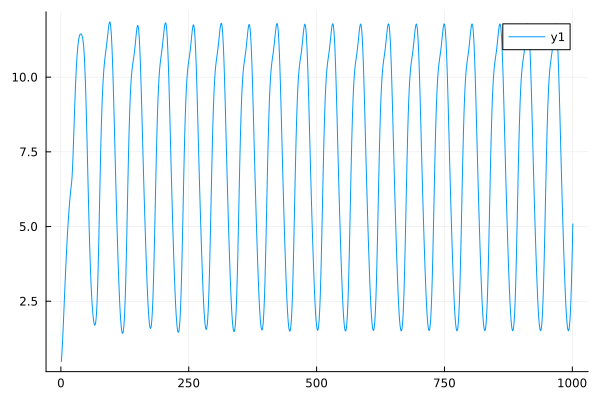

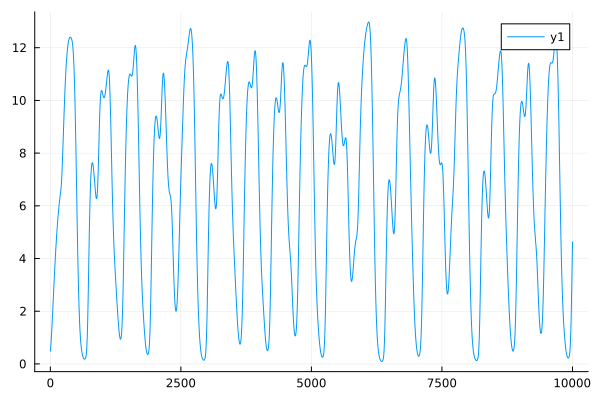

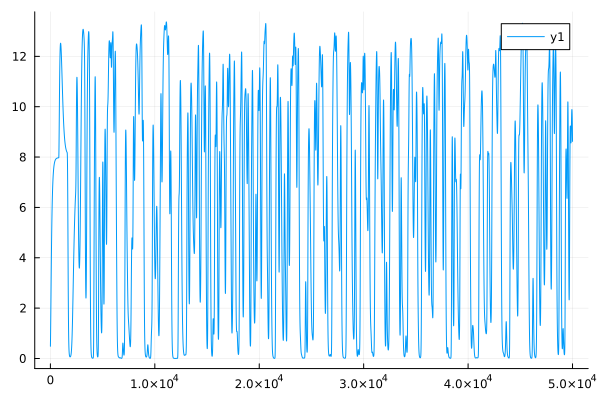

In [50]:
using DelayDiffEq
using Plots

function mg(dx,x,h,p,t)
    L,V,n,τ = p
    hist=h(p,t-τ)[1]
    dx[1]=-L*x[1]+V*hist/(1+hist^n)
end
V(s)=16*s^5/(1+s^5)
tspan=(0.0,100.0)
x0=[0.5]
τ=2
lags=[τ]
V0=2
L=1
n=7
h(p,t)=[0.5]
p=(L,V0,n,τ)
prob=DDEProblem(mg,x0,h,tspan,p; constant_lags=lags)
alg = MethodOfSteps(BS3())
sol=solve(prob,alg,reltol=1e-8,saveat=0.1)
Vs=[V(s[1]) for s ∈ sol.u]
display(plot(Vs))
τ=2
p=(1,2,9.65,τ)
lags=[τ]
tspan=(0.0,100.0)
prob=DDEProblem(mg,x0,h,tspan,p; constant_lags=lags)
sol=solve(prob,alg,reltol=1e-8,saveat=0.01)
Vs=[V(s[1]) for s ∈ sol.u]
display(plot(Vs))
τ=8
p=(1,2,9.65,τ)
lags=[τ]
tspan=(0.0,500.0)
prob=DDEProblem(mg,x0,h,tspan,p; constant_lags=lags)
sol=solve(prob,alg,reltol=1e-8,saveat=0.01)
Vs=[V(s[1]) for s ∈ sol.u]
display(plot(Vs))